## Assignment 10: Interactive data visualization

As we discussed in class, interactive graphics in some instances can be more effective ways of communicating information than static charts.  As web browser technology has advanced, the capacity to create interactive visualizations in the browser has increased as well.  

The Jupyter Notebook is very well-suited for working with interactive visualizations, considering that it is a website itself!  In this assignment, you'll learn a few ways to convert charts you've completed in other assignments to interactive, web-based visualizations.  

Before you get started, you may need to install some packages from the command line, if you haven't done so already in class.   The packages are already installed in the library computers, but other computers (e.g. the ones in Scharbauer Hall) may not yet have them installed.   Shut down this notebook session (if it is active), open a command prompt, and enter the following commands at the command line: 

* `conda install ipywidgets`
* `pip install plotly`
* `pip install cufflinks`

These three packages will give you access to the interactive frameworks that we'll be using in this assignment.  

Re-launch this notebook; we'll now be able to import everything we need.  Run the following cell to import all of the libraries for this assignment: 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import cufflinks as cf
from ipywidgets import interact

Thus far this semester, you've learned how to embed charts inline in your Jupyter Notebooks with the "magic" function `%matplotlib inline`.  However - the Notebook has much more functionality than that!  Simply specifying the magic function `%matplotlib notebook` will show your charts as interactive web visualizations.  Let's try with an example from Assignment 6.  

In [2]:
from pandas.io import wb
ctrys = ['US', 'GB', 'DE', 'CN', 'CA', 'JP', 'FR'] 
lex = wb.download(indicator = 'SP.DYN.LE00.IN', country = ctrys, start = 2013, end = 2013).reset_index()
lex.columns = ['country', 'year', 'lex']
lex_sorted = lex.sort('lex', ascending = False)

And the plot: 

C:\Users\kylewalker\AppData\Local\Continuum\Anaconda3\envs\geog\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning:

The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.



<IPython.core.display.Javascript object>


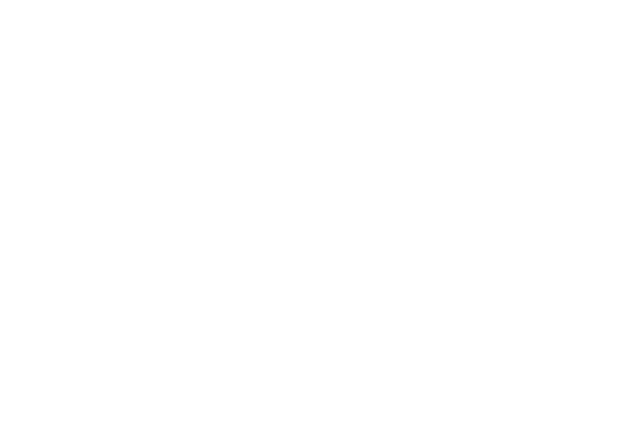

In [3]:
%matplotlib notebook
sns.stripplot(x = 'lex', y = 'country', data = lex_sorted)

Your `seaborn` dot plot is now an interactive web visualization!  Use the tools that appear below the plot to interact with it; by clicking the crosshairs, for example, you can pan around the plot by holding your left mouse button down, and zoom in and out by holding the right mouse button.  You can also resize the plot by moving your cursor over the lower-right corner of the plot (you should see a little icon there) and clicking and dragging.  When your cursor is on the plot, the graphic will show the X and Y coordinates of your cursor as well, provided that your axes are quantitative (in this case, our y-axis is categorical, so nothing will appear).  

__Interactive widgets in the Notebook__

In class, I also demonstrated the use of _interactive widgets_ from the `ipywidgets` package, which allow you to turn your Notebook into a graphical user interface, or GUI.  This can be very useful when exploring data in the notebook, as it minimizes the code you might need to write to perform an operation over and over again.  

During our discussions on data visualization, we learned how to perform _highlighting_ to make a data series stand out against a larger set of data series.  Our in-class example showed unemployment in Greece: 

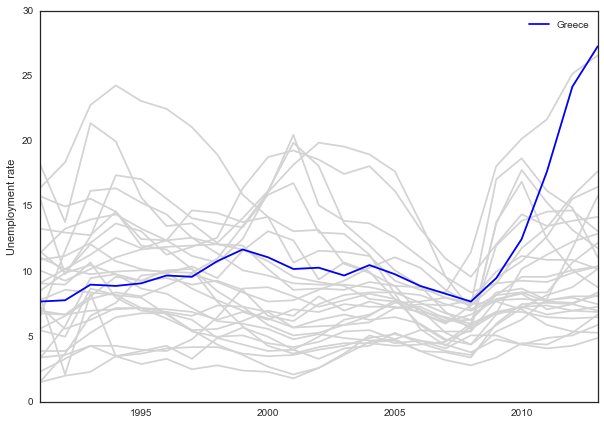

In [4]:
%matplotlib inline

sns.set_style('white')

eu_countries = ['BE', 'BG', 'CZ', 'DK', 'DE', 'EE', 'IE', 'GR', 'ES', 'FR', 'HR', 
               'IT', 'CY', 'LV', 'LT', 'LU', 'HU', 'MT', 'NL', 'AT', 'PL', 'PT', 
               'RO', 'SI', 'SK', 'FI', 'SE', 'GB']
               
ue = wb.download(indicator = "SL.UEM.TOTL.ZS", 
                 country = eu_countries, start = 1991, 
                 end = 2013)

ue.reset_index(inplace = True)

ue.columns = ['country', 'year', 'unemployment']

ue['year2'] = ue.year.astype(float)

full = ue.pivot(index = 'year2', columns = 'country', 
                values = 'unemployment')

greece = full['Greece']

full.plot(style = 'lightgrey', legend = False, figsize = (10, 7))
greece.plot(style = 'blue', legend = True)

plt.xlabel("")
plt.ylabel("Unemployment rate")

However: what if you'd like to highlight a different country?  Certainly, you could replace `'Greece'` in your code with another country name; however, it might prove tedious to do this over and over again.  

The `interact` function in the `ipywidgets` package can help with this.  It allows you to generate interactive menus that will modify your plots in response to some user input.  To do this, you'll need to wrap your code inside of a function that defines which components of your code can vary, then supply this function to `interact`.  Here's how:  

<function __main__.europe_chart>

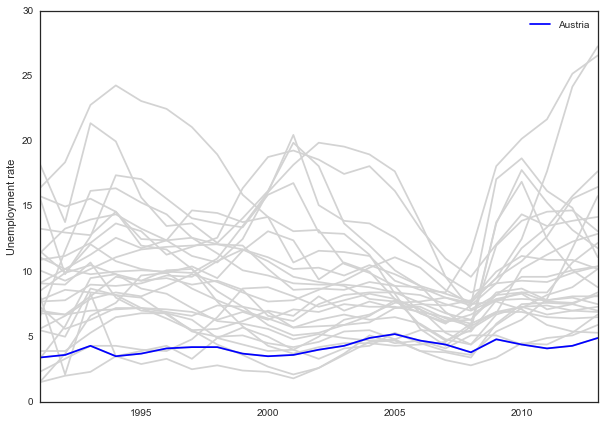

In [5]:
values = list(ue.country.unique())

def europe_chart(country, color): 
    c = full[country]
    full.plot(style = 'lightgrey', legend = False, figsize = (10, 7))
    c.plot(style = color, legend = True)
    plt.xlabel("")
    plt.ylabel("Unemployment rate")

interact(europe_chart, country = values, color = 'blue')

Try interacting with the plot!  Choose different countries from the drop-down menu, and type in different color names into the "color" box to customize your chart.  

Take a moment to understand the code that generates the interactive plot.  We first generate a list object called `values` from the unique country names in our `ue` data frame.  We then define a function, named `europe_chart`, that is set up to build the unemployment chart we drew earlier.  The function has two parameters: `country`, which is the country to highlight, and `color`, which is the highlighting color.  We then supply our new function to the `interact` function to generate the interactive application.  

To get `interact` to work correctly, we have to supply a specific type of object as arguments to our function.  `interact` will then interpret the object type and generate widgets accordingly.  `interact` will interpret the following: 

* A list, tuple, or dictionary of values as a drop-down menu; 
* A string value as a text box; 
* A `True`/`False` value as a check box; 
* A tuple of integers or floats as a slider.  

We supply these to `interact` accordingly, and get our interactive chart with menus!

__Interactive charting with Plotly__

We're now going to turn to an external application, Plotly, to render interactive charts.  As we discussed in class, Plotly is a service that hosts and renders interactive web-based charts.  Charts can be built in Plotly using its web GUI, or via its APIs, which it has for many popular programming languages including Python.  

To use Plotly, you'll need to sign up for a Plotly account.  If you already did this in class, you can go ahead and skip this.  If not, carefully follow these steps: 

* Visit http://plot.ly
* Look for the "Sign Up" button in the upper-right hand corner of the screen 

![sign_up](http://personal.tcu.edu/kylewalker/img/sign_up.PNG)

* Use the "Create Account" options to create an account.  All you need to provide is an email address, a username, and a password.  
* You should receive an email asking you to confirm your registration.  Do this, and you'll be taken to your Plotly dashboard. 
* Look for a drop-down menu with your username in the upper-right hand corner of the screen.  Click there, then choose the __Settings__ option.  

![settings](http://personal.tcu.edu/kylewalker/img/settings.PNG)

* On the left-hand side of the screen, you'll see a menu.  Click __API settings__.  
* Note your "Username" and "API Key".  __Replace the string values below with your corresponding username and API key.__

In [6]:
my_username = 'Delete me and put your username within these quotes'
my_api_key = 'Delete me and put your API key within these quotes'

You can then sign in to Plotly with your credentials, and communicate directly with your Plotly account from your Jupyter Notebook session: 

In [8]:
py.sign_in(username = my_username, api_key = my_api_key)

From here, you can generate interactive Plotly charts in multiple ways.  The Plotly Python API allows you to build Plotly visualizations from the ground up in Python; you can learn more here: https://plot.ly/python/.  

We're going to generate Plotly visualizations a couple different ways, however.  The Plotly Python package includes a function, `iplot_mpl()`, that will attempt to convert `matplotlib` static visualizations into interactive Plotly plots, and show them inside of a Jupyter Notebook session.  This function works with both the `pandas` `.plot()` method and `seaborn` plots; however not all `seaborn` charts are fully supported.  

The other way to generate Plotly visualizations is through the `cufflinks` package.  `cufflinks` extends the `.plot()` method in `pandas` to generate interactive Plotly charts instead - generally, all you have to do is replace `.plot()` with `.iplot()`!

Let's try the first way.  We'll build a time series plot of unemployment for four countries.  Plotly does not quite handle `matplotlib` legends intelligently yet - it converts legends to text annotations - so we'll turn off the legend for now.  After creating the line chart, we use the `plt.gcf()` function to __g__et the __c__urrent __f__igure, and assign the figure to the variable `fig`.  We then pass our `fig` variable to the `py.iplot_mpl()` function - and our interactive chart appears!

In [9]:
full[['Germany', 'Spain', 'Greece', 'United Kingdom']].plot(legend = False)

fig = plt.gcf()

py.iplot_mpl(fig)

Interact with the plot!  Hovering over any line will give you descriptive information about the data points; you can also zoom in and out and pan around using the tools that appear above the chart when you hover your cursor over it.  

At this point, you might be thinking that you'd like to dress up the chart a bit more.  For example, a legend _would_ be nice, as would some more descriptive axis labels and a chart title.  This all _can_ be done using Python; however, this plot that we've generated now also lives in your Plotly account on the web.  Click the "Edit chart" link in the lower-right corner.  It'll take you to the chart in your Plotly account!  From here, you can modify the chart interactively if you'd like.  For example - watch the animated GIF below to show how I modify some chart options and add an interactive legend using the Plotly GUI: 

<img src="http://personal.tcu.edu/kylewalker/img/plotly1.gif" style="width: 800px">

I now want to bring my plot back into my Jupyter Notebook to showcase it.  All Plotly plots can be embedded in other webpages as __iframes__.  You used iframes in Assignment 8 to view the JSON from the Fort Worth Open Data API; however I didn't explain in full detail exactly what iframes do.  An iframe is like a "window" from one website into another website, allowing us to embed content from a different website into our sites.  All of our Plotly visualizations themselves are websites, and in turn can be embedded in our Jupyter Notebooks, or any website for that matter.  

To do this, click the "Share" option from the menu on the left-hand side of the chart.  Choose the "Embed" tab; this will give you iframe HTML code that you could plug into any website.  iframe support is built into the Jupyter Notebook as you learned in Assignment 8; we can also use the magic function `%%html` to designate a code cell as HTML, and pass our HTML code to that cell.  I've used my embed code below; copy your iframe code from your Plotly account, and try out yours!

In [10]:
%%html

<iframe width="900" height="550" frameborder="0" scrolling="no" src="https://plot.ly/~walkerke/446.embed"></iframe>

__Plotly graphs with `cufflinks`__

In class, I also demonstrated the use of `cufflinks` to extend `pandas` plotting to incorporate Plotly plots.  On a basic level, all you need to do to create an interactive Plotly chart is replace `.plot()` with `.iplot()`: 

In [11]:
full[['Sweden', 'Finland', 'Denmark']].iplot()

Note how `cufflinks` handles the legend intelligently.  Many other plot types are available, with lots of options.  I encourage you to browse the documentation here: https://plot.ly/ipython-notebooks/cufflinks/.  

For example, we can build an interactive small multiples plot of unemployment in Europe, customizing the plot to our liking.  Beyond that, these plots are stored in your Plotly account, and fully editable as you've learned!

In [15]:
full.iplot(subplots = True, kind = 'line', shape = (7, 4), subplot_titles = True, 
           shared_yaxes = True, shared_xaxes = True, legend = False, title = 'Unemployment in the EU, 1991-2013')

## Exercises

I only have two exercises for you to get credit for this assignment.   You'll be using the `babynames` dataset, which you should be very familiar with by now.  

__Exercise 1: __ Consider the following plot, which compares male and female baby Taylors since 1980: 

In [13]:
df = pd.read_csv('http://personal.tcu.edu/kylewalker/data/babynames.csv')

df80 = df[df.year > 1979]

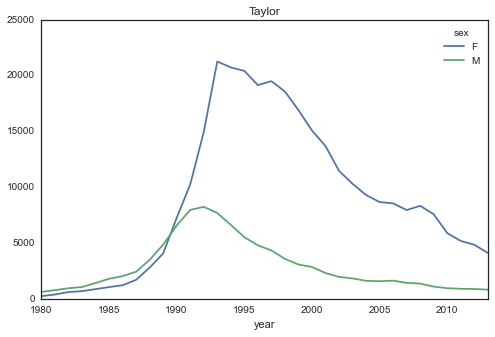

In [14]:
w1 = df80[df80.name == 'Taylor'].pivot(index = 'year', columns = 'sex', values = 'n').fillna(0)

w1.plot(figsize = (8, 5), title = 'Taylor')

Use the `interact` interactive widget function to create an interactive GUI in which the user can type in any name and return a plot that compares male and female frequencies for that name since 1980.  The plot title should update automatically as well.  

__Exercise 2: __  In Assignment 9, you completed the following Exercise: 

> In Question 2, we looked at the possible influence of Disney princess movies on female baby names. Pick four male names from popular culture over the past 30 years and produce a chart that illustrates their influence (or lack thereof) on baby names. Be strategic with your name decisions! You can create a single line chart with four series, or a small multiples chart with facets - pick the one you think is ideal!

Convert this chart you made into an interactive Plotly chart, and embed it in your Notebook!  You can use the Plotly `matplotlib` converter or build the chart with `cufflinks`, either way is fine!

Submit your assignment by the deadline of __Thursday, November 19__ to receive full credit.  